In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Google Sheet link: [link](https://docs.google.com/spreadsheets/d/1vAx4TWZAkyadIhaMz7_bIfcotw4AVBy3sJ7_5YPJftQ/edit?usp=sharing)


In [ ]:
# Reading data from the Google Sheet link
google_sheet_link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSfT4hCuwP9IjE39su-Jmv88uxXxz6qZEbHMxWmxsf5wT-9_mEs2H-hVJng5pBDfqps1SlhhHHY5lCt/pub?gid=0&single=true&output=csv'
data = pd.read_csv(google_sheet_link)

In [ ]:
data.head()

,image,label
0,https://assets.stylumia.com/w_400_h_auto/jpg/2...,Flatlays
1,https://assets.stylumia.com/w_400_h_auto/jpg/2...,Ankle
2,https://assets.stylumia.com/w_400_h_auto/jpg/2...,Ankle
3,https://assets.stylumia.com/w_400_h_auto/jpg/2...,Ankle
4,https://assets.stylumia.com/w_400_h_auto/jpg/2...,Flatlays


In [ ]:
data.dropna(inplace=True)

In [ ]:
data['label'].unique()
total_unique_lables = len(data['label'].unique())
total_unique_lables

4

In [ ]:
# Preprocessing the image data and labels
X = []
y = []

for index, row in data.iterrows():
    img_url = row['image']
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content)).resize((100, 100))
    X.append(np.array(img))
    y.append(row['label'])

In [ ]:
# Converting the lists to arrays
X = np.array(X)
y = np.array(y)

# Normalizing the image data
X = X.astype('float32') / 255

In [ ]:
# Creating the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(total_unique_lables, activation='softmax'))

# Loss function used: **categorical_crossentropy**
---
# optimizer='**adam**'

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Converting the labels to integer labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Converting the labels to one-hot encoded vectors
y = keras.utils.to_categorical(y, num_classes=total_unique_lables)

In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
15/15 [==============================] - 6s 303ms/step - loss: 3.3736 - accuracy: 0.2632 - val_loss: 1.4140 - val_accuracy: 0.2632
Epoch 2/10
15/15 [==============================] - 4s 249ms/step - loss: 1.2287 - accuracy: 0.4671 - val_loss: 1.2437 - val_accuracy: 0.4474
Epoch 3/10
15/15 [==============================] - 5s 333ms/step - loss: 1.0205 - accuracy: 0.5877 - val_loss: 1.1786 - val_accuracy: 0.5175
Epoch 4/10
15/15 [==============================] - 4s 254ms/step - loss: 0.8216 - accuracy: 0.7259 - val_loss: 1.0839 - val_accuracy: 0.5702
Epoch 5/10
15/15 [==============================] - 4s 247ms/step - loss: 0.6489 - accuracy: 0.8333 - val_loss: 0.9554 - val_accuracy: 0.6579
Epoch 6/10
15/15 [==============================] - 6s 440ms/step - loss: 0.5253 - accuracy: 0.8684 - val_loss: 0.9091 - val_accuracy: 0.6316
Epoch 7/10
15/15 [==============================] - 4s 256ms/step - loss: 0.4503 - accuracy: 0.8662 - val_loss: 0.9716 - val_accuracy: 0.5877
Epoch 

In [ ]:
# Evaluating the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

5/5 [==============================] - 1s 108ms/step - loss: 0.9952 - accuracy: 0.5455
Test accuracy: 0.5454545617103577


1/1 [==============================] - 0s 31ms/step


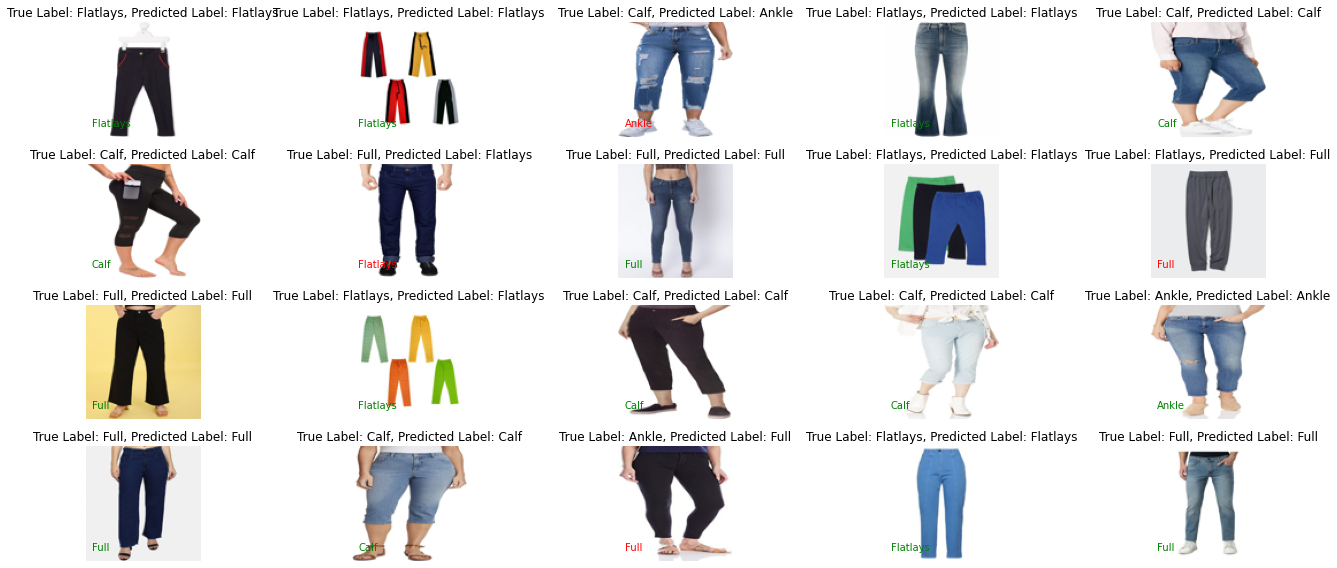

In [ ]:
import matplotlib.pyplot as plt

# Selecting random images and their corresponding labels from the test set
total_num = 20
random_indices = np.random.choice(range(len(X_test)), size=total_num, replace=False)
test_images = X_test[random_indices]
true_labels = label_encoder.inverse_transform([np.argmax(y_test[idx]) for idx in random_indices])

# Predicting the labels for the images
predicted_labels = []
for test_image in test_images:
    predicted_label = label_encoder.inverse_transform([np.argmax(model.predict(test_image.reshape(1, 100, 100, 3)))]).item()
    predicted_labels.append(predicted_label)

# Displaying the images and their predicted and actual labels
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(test_images[i])
    ax.set_title(f"True Label: {true_labels[i]}, Predicted Label: {predicted_labels[i]}")
    ax.axis('off')
    if true_labels[i] == predicted_labels[i]:
        ax.text(5, 90, predicted_labels[i], fontsize=10, color='green')
    else:
        ax.text(5, 90, predicted_labels[i], fontsize=10, color='red')

plt.tight_layout()
plt.show()

# **Live demo**

In [ ]:
# Function to load image from file content
from google.colab import files
def load_image_file_content(file_content):
    img = Image.open(BytesIO(file_content)).resize((100, 100))
    img_array = np.array(img).astype('float32') / 255
    return img, img_array

# Taking image file input from user
uploaded = files.upload()

# Loading image from file content
for file_name, file_content in uploaded.items():
    img, img_array = load_image_file_content(file_content)

    # Predicting the label for the image
    predicted_label = label_encoder.inverse_transform([np.argmax(model.predict(img_array.reshape(1, 100, 100, 3)))]).item()

    # Displaying the image with predicted label
    fig, ax = plt.subplots(figsize=(4,4))
    ax.imshow(img)
    ax.set_title(f"Predicted Label: {predicted_label}")
    ax.axis('off')
    plt.show()
